<a href="https://colab.research.google.com/github/heitor-eng/H_Data_Science/blob/master/Machine_Learning_Project_PIBB11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict the future price of the PIBB11 with Machine Learning
This is a project which I am using the Linear Regression method to predict the future price of the ETF - PIBB11.



###PIBB11
It is an ETF (Exchange Trade Fund)- and as an ETF that seeks to reflect the performance, before fees and expenses, of the Brazil Index 50 (IBrX50).
The IBrX50 is the average performance indicator of the 50 most traded and most representative assets in the Brazilian stock market. The index is the result of a theoretical asset portfolio, reformulated every four months. It is composed exclusively of shares and units. To be included in the IBrX50, the asset must be among the 50 most traded on B3 in the period of validity of the 3 previous portfolios. The assets must also have a presence in trading of 95% in the same period. From [Info Money](https://www.infomoney.com.br/cotacoes/etf-pibb11/).


<p align=center>
<img src="https://github.com/heitor-eng/H_Data_Science/blob/master/Imagens/stock-market-g69876065d_1920.jpg?raw=true" width="50%"></p>

The dataset was take from the web page of [Yahoo Finance - PIBB11](https://br.financas.yahoo.com/quote/PIBB11.SA/history?p=PIBB11.SA&.tsrc=fin-srch)

In [ ]:
# Description: Predict the future price of the PIBB11

In [ ]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
plt.style.use('fivethirtyeight')

In [ ]:
# Load the dataset
from google.colab import files
files.upload()

In [ ]:
# Store the data
df = pd.read_csv('PIBB11.SA.csv',index_col="Date",parse_dates = True)

# Show the data
print('The number of rows: ',df.shape[0])
print("And the columns are: ", df.shape[1])

# The head of the dataset
df.head()

The number of rows:  248
And the columns are:  6


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,204.699997,205.000000,202.199997,203.399994,203.399994,22025
2021-01-05,204.690002,205.309998,200.369995,204.830002,204.830002,46829
2021-01-06,203.979996,208.410004,203.979996,205.649994,205.649994,46981
2021-01-07,205.399994,212.929993,205.300003,212.440002,212.440002,13758
2021-01-08,212.399994,216.479996,211.820007,216.130005,216.130005,47005


In [ ]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

## Linear Regression

Is one of the two most famous Machine Learning Algorithms which come under supervised learning techniques. Since this algorithm is supervised in nature hence this algorithm use labeled datasets to make the predictions.

It is one of the most simple Machine learning algorithm that comes under Supervised Learning technique and used for solving regression problems.

The goal of linear regression is to find the best fit line that can accurately predict the output for the continuous dependent variable. And it is used for predicting the continuous dependent variable with the help of independent variables, such as price, age, salary, etc.

**Source**: [Javatpoint](https://www.javatpoint.com/linear-regression-vs-logistic-regression-in-machine-learning)

In [ ]:
# Copy the dataframe
df2 = df.copy()

In [ ]:
# Create a new column called "Numbers"  that ranges from 0 to the lenght of the data set
df2["Numbers"] = list(range(0,len(df2)))

In [ ]:
# Store the "Numbers" column into a variable called 'X' as an array
X = np.array(df2[["Numbers"]])

> This was just a step to be done, so now I can format the data properly to int into our model for training.

In [ ]:
# Store the 'Close price as an array in a variable called 'y'
y = df2['Close'].values

In [ ]:
# Create and train the model
lin_model = LinearRegression().fit(X,y)

> `fit()` it is just another term for a train method.

In [ ]:
print('Intercept:',lin_model.intercept_)
print('Slope:',lin_model.coef_)

Intercept: 214.41431038253015
Slope: [-0.10097724]


Equation of the line:

> $y = m.x +b$

Where:

* m : Slope of the line

* b : Intercept of the line

In [ ]:
# Prepare the data for visualization
# get the predicted price from the model and store them into a variable called y_pred
# Equation of the line y = m*x + b
y_pred = lin_model.coef_ * X + lin_model.intercept_

In [ ]:
# Store the predict values in a new column called Pred
df2['Pred'] = y_pred

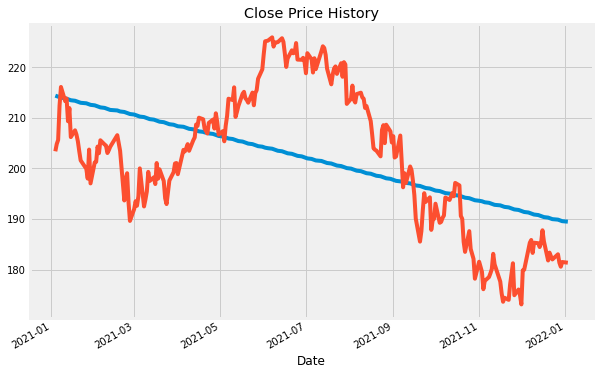

In [ ]:
# Plot the data
fig, ax = plt.subplots(figsize =(9,6),dpi = 72)
df2["Pred"].plot()
df2['Close'].plot()
plt.title('Close Price History')

plt.show()

## First impression

As the chart shows, the values of the column `df2['Close']` (red line) has high variance, so the performance of this model won't be that good.

We can interpret that because the red line has a lot of points that had a good amount of distance from the blue line, which is the column `df2['Pred']` meaning a high variance.

### R² (coefficiente of determination):

The coefficiente of determination or R² score helps to show the model's goodness of fit or how well the model fits the data right the way.

The R2 score is a very important metric that is used to evaluate the performance of a regression-based machine learning model. It is pronounced as R squared and is also known as the coefficient of determination. It works by measuring the amount of variance in the predictions explained by the dataset. Simply put, it is the difference between the samples in the dataset and the predictions made by the model.

**Source**: [R² score](https://thecleverprogrammer.com/2021/06/22/r2-score-in-machine-learning/)

In [ ]:
# How good is the model?
r2_score(df2['Close'],df2['Pred'])

0.261502746749677

In [ ]:
# Show the possible price fot the nest day based on the model
lin_model.coef_*len(df2) + 1 + lin_model.intercept_

array([190.37195435])

## Conclusion:
So the model believes that the price of the PIBB11 for the day 02 of January of 2022 would be R$ 190,37.

As the coefficient of determination shows is R² = 0,26, that means the performance of this model isn't good, so to predict the price of this ETF will be interesting to use another algorithm of machine learning.